Estimate the Posterior with Bayes and Markov Chain Monte Carlo (MCMC)
-----

<center><img src="https://www.predikkta.com/site-images/ctr-formula.png" width="500"/></center>

A company has hired you to help assess their new ad campaign.

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.misc import factorial
from scipy.stats import beta

%matplotlib inline

-----
Likelihood
-----

In [3]:
def likelihood(theta, n, x):
    "Likelihood function for a binomial distribution"
    return (factorial(n) / (factorial(x) * factorial(n - x))) \
            * (theta ** x) * ((1 - theta) ** (n - x))

The ad has been presented to 10 users so far, and 7 of the users have clicked on it. We would like to estimate the probability that the next user will click on the ad. 

In [4]:
# TODO: Find the MLE for Theta

In [5]:
# Solution: 
n_clicks = 7
n_impressions = 10

ctr = n_clicks / n_impressions # Observed click through rate
# 0 to 1, all possible click through rates
possible_theta_values = list(map(lambda x: x/100., range(100)))

# Evaluate the likelihood function for possible click through rates
likelihoods = list(map(lambda theta: likelihood(theta, n=n_impressions, x=n_clicks)\
                                , possible_theta_values))

# Pick the best theta
mle = possible_theta_values[np.argmax(likelihoods)]
print(f"The MLE for theta is {mle}")

The MLE for theta is 0.7


In [6]:
# TODO: Plot the likelihoods and the MLE for Theta

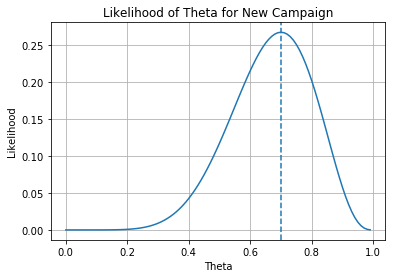

In [7]:
# Solution: 
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods)
ax.axvline(mle, linestyle = "--")
ax.set_xlabel("Theta")
ax.set_ylabel("Likelihood")
ax.grid()
ax.set_title("Likelihood of Theta for New Campaign")
plt.show()

-----
The Prior
-----

However, some of the other analysts are skeptical. The performance of this campaign seems extremely high given how our other campaigns have done historically. 

Let's overlay this likelihood function with the distribution of success rates from our previous campaigns:

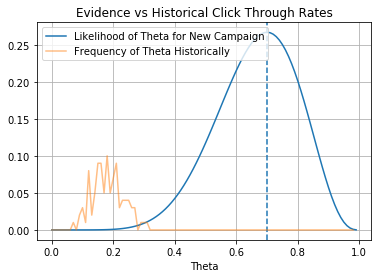

In [8]:
# Historical data:

click_through_rates = np.array([ 0.15835141,  0.24594907,  0.23203796,  0.1697417 ,  0.26456219,
        0.10688894,  0.15942029,  0.10251509,  0.21555916,  0.26701571,
        0.22357845,  0.09484649,  0.30164751,  0.25938926,  0.20065635,
        0.21978022,  0.12796353,  0.22071393,  0.16535174,  0.16429616,
        0.11485149,  0.12111554,  0.1498829 ,  0.15991211,  0.25595873,
        0.21068217,  0.15643511,  0.21726526,  0.22079879,  0.13604666,
        0.18088553,  0.13316195,  0.15502451,  0.12268956,  0.18240807,
        0.12761254,  0.20318112,  0.12689007,  0.19252008,  0.18780152,
        0.18663905,  0.29960441,  0.18061674,  0.17408124,  0.19622715,
        0.12341419,  0.27224603,  0.19687142,  0.23680456,  0.16712235,
        0.14273431,  0.17844061,  0.20477619,  0.15386883,  0.24710801,
        0.14167209,  0.21142326,  0.16989485,  0.21256039,  0.14577685,
        0.15675331,  0.1918745 ,  0.25055707,  0.24775785,  0.23608445,
        0.21158309,  0.16586965,  0.12852698,  0.18548387,  0.16216216,
        0.21016629,  0.20659004,  0.273906  ,  0.16026009,  0.17994263,
        0.0931338 ,  0.23344397,  0.15880994,  0.12904559,  0.07740692,
        0.1784027 ,  0.1030481 ,  0.2738525 ,  0.26075949,  0.25295508,
        0.18004382,  0.21100596,  0.20576132,  0.24811835,  0.1496106 ,
        0.17937585,  0.16192643,  0.18058628,  0.15143824,  0.20622568,
        0.31488673,  0.20617611,  0.19254186,  0.18061089,  0.1891835 ])

f, ax = plt.subplots(1)
ax.axvline(mle, linestyle = "--")
ax.plot(possible_theta_values, likelihoods)

zero_to_one = [j/100. for j in range(100)]
counts, bins = np.histogram(click_through_rates
                            , bins=zero_to_one)
counts = counts / 100.
ax.plot(bins[:-1],counts, alpha = .5)
line1, line2, line3 = ax.lines
ax.legend((line2, line3), ('Likelihood of Theta for New Campaign'
                           , 'Frequency of Theta Historically')
                          , loc = 'upper left')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Evidence vs Historical Click Through Rates")
plt.show()

__TODO__:  Summarize how the relationship between historical data and Theta

__Solution__:

Clearly, the maximum likelihood method is giving us a value that is outside what we would normally see. 

Perhaps our analysts are right to be skeptical; as the campaign continues to run, its click-through rate could decrease. 

Alternatively, this campaign could be truly outperforming all previous campaigns. We can't be sure. 

In [9]:
# TODO: Fit beta to previous CTRs using scipy.stats.beta

In [16]:
# Solution:

#fit beta to previous CTRs
prior_parameters = beta.fit(click_through_rates, 
                            floc = 0, 
                            fscale = 1)
prior_a, prior_b = prior_parameters[:2] # Extract alpha, beta from fit
print(f"The best value for α is: {prior_a:.4}")
print(f"The best value for β is: {prior_b:.4}")

The best value for α is : 11.1
The best value for β is : 48.03


In [11]:
# TODO: Plot estimated prior

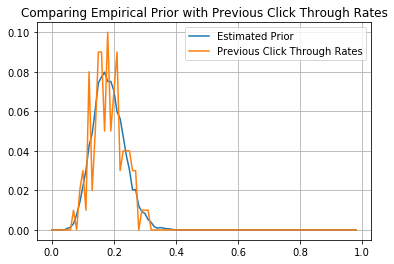

In [12]:
# Solution:

# Define prior distribution sample from prior
prior_distribution = beta(prior_a, prior_b)
# Get histogram of samples
prior_samples = prior_distribution.rvs(10000)
# Get histogram of samples
fit_counts, bins = np.histogram(prior_samples, zero_to_one)
# Normalize histogram
fit_counts = list(map(lambda x: float(x)/fit_counts.sum()
                         , fit_counts))
# Plot
f, ax = plt.subplots(1)
ax.plot(bins[:-1], fit_counts)

hist_ctr, bins = np.histogram(click_through_rates
                              , zero_to_one)
hist_ctr = list(map(lambda x: float(x)/hist_ctr.sum()
                              , hist_ctr))
ax.plot(bins[:-1], hist_ctr)
estimated_prior, previous_click_through_rates = ax.lines
ax.legend((estimated_prior, previous_click_through_rates)
          ,('Estimated Prior'
            , 'Previous Click Through Rates'))
ax.grid()
ax.set_title("Comparing Empirical Prior with Previous Click Through Rates")
plt.show()

----
The Posterior
----

Let's now obtain samples from the posterior. We select our prior as a Beta(α, β) from last step

In [13]:
import pymc3 as pm

In [14]:
clicks = np.array([n_clicks])
impressions = np.array([n_impressions])

with pm.Model() as model:

    theta_prior = pm.Beta('prior', 11.5, 48.5)
    observations = pm.Binomial('obs',
                               n=impressions,
                               p=theta_prior,
                               observed = clicks)     

    start = pm.find_MAP()    # Find good starting values for the sampling algorithm

    step = pm.NUTS(state=start)     # Choose a particular MCMC algorithm     

    # Obtain samples
    trace = pm.sample(5000, 
                      step,
                      start=start, 
                      progressbar=True)              

/Users/brianspiering/anaconda3/envs/stats/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Optimization terminated successfully.
         Current function value: 6.130835
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6


100%|██████████| 5000/5000 [00:02<00:00, 1959.80it/s]


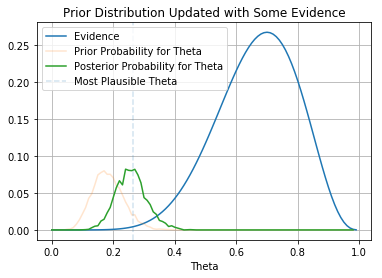

In [15]:
# Get histogram of samples from posterior distribution of CTRs
posterior_counts, posterior_bins = np.histogram(trace['prior'],
                                                bins=zero_to_one)

#  Normalized histogramp
posterior_counts = posterior_counts / float(posterior_counts.sum())
# Take the mean of the samples as most plausible value
most_plausible_theta = np.mean(trace['prior'])
# Histogram of samples from prior distribution
prior_counts, bins = np.histogram(prior_samples
                                  , zero_to_one)#normalize
prior_counts = list(map(lambda x: float(x)/prior_counts.sum()
                   , prior_counts))
# Plot
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods)
ax.plot(bins[:-1],prior_counts, alpha = .2)
ax.plot(bins[:-1],posterior_counts)
ax.axvline(most_plausible_theta, linestyle = "--", alpha = .2)
line1, line2, line3, line4 = ax.lines
ax.legend((line1, line2, line3, line4), ('Evidence',
                                         'Prior Probability for Theta',
                                         'Posterior Probability for Theta',
                                         'Most Plausible Theta',), loc = 'upper left')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Prior Distribution Updated with Some Evidence")
plt.show()

__TODO__: What does the posterior tell us?

__Solution__: What does the posterior tell us?
    
There is almost no chance that our campaign will continue to perform like previous campaigns.

Either it is genius or there is an error! 🤔